# Process the v51.1 Data into hdf5
### Prepare Imputed Genotype Files in HDF5 Format
Uses imported function from vcf_to_hdf5.py
The original version can be found in `process_alis_imputed_v43.ipynb`

### Here: Test Run for Chromosome 22
Then port this function into './cluster' for a run on O2 for chromosome 1-21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import socket as socket
import os as os
import sys as sys
import multiprocessing as mp
import h5py
import allel

socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd())
print(f"CPU Count: {mp.cpu_count()}")

#sys.path.insert(0, "/n/groups/reich/hringbauer/git/hapBLOCK/python3/prepare")  # hack to get local package first in path
from ancIBD.IO.prepare_h5 import vcf_to_1240K_hdf

#from hapsburg.PackagesSupport.h5_python.h5_functions import merge_in_ld_map
#sys.path.append("/n/groups/reich/hringbauer/git/hapBLOCK/python3/")
#from IO.h5_modify import merge_in_af, get_af, get_af1000G, lift_af

compute-a-16-36.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK
CPU Count: 32


# Run all steps of the transformation for whole Chromosomes bundled up
Main run: **in parallel on cluster**: See `./cluster/vcf_to_hdf5.py`

For v53.1:
Takes about 4h for long chromosome!

### Email: v53.1 description from Ali
Imputation of v53.1 for 25,723 samples is now available in bcf format at the following directory, 

/n/data1/hms/genetics/reich/1000Genomes/ali/WholeGenomeImputation/imputed_r2/v53.1
/n/data1/hms/genetics/reich/1000Genomes/ali/WholeGenomeImputation/imputed_r2/v54.1

### Check that update to next version in batchfile:

In [2]:
!cat /n/groups/reich/hringbauer/git/hapBLOCK/cluster/prep_hdf5_ali/batchfile.sh

#!/bin/bash
#SBATCH --time=6:00:00
#SBATCH --partition=short
#SBATCH --nodes=1
#SBATCH --ntasks-per-node=1
#SBATCH --mem-per-cpu=45g
#SBATCH --job-name=prep_hdf5.49.2
#SBATCH --export=NONE
#SBATCH --output=./logs/%A_%a.out
#SBATCH --error=./logs/%A_%a.err
#SBATCH --array=1-22 #%0-12658%200
#unset SLURM_EXPORT_ENV
#export OMP_NUM_THREADS=1

module load gcc/6.2.0
module load python/3.7.4
#module load gsl/2.3 openblas/0.2.19
source /n/groups/reich/hringbauer/explore_ntbk/jptvenv37/bin/activate
module load samtools
module load bcftools

# Execute the following tasks
#python3 vcf_to_hdf5.v49.2.py $SLURM_ARRAY_TASK_ID 
python3 vcf_to_hdf5.v53.1.py $SLURM_ARRAY_TASK_ID

In [5]:
!cat /n/groups/reich/hringbauer/git/hapBLOCK/cluster/prep_hdf5_ali/vcf_to_hdf5.v53.1.py

import numpy as np
import pandas as pd
import os as os
import sys as sys

sys.path.insert(0, "/n/groups/reich/hringbauer/git/hapBLOCK/python3/prepare")  # hack to get local package first in path
from prepare_h5 import vcf_to_1240K_hdf

#####################################################
### Set Version. Manually make sure that Folders exist (some need creation)
vrs = "53.1"
v0 = vrs.split(".")[0]

#####################################################
### Run the Main Program
    
if __name__ == "__main__":
    if len(sys.argv) < 2:
        raise RuntimeError("Script needs argument (which chromosome to run)")
    
    ### Load Input Parameters
    ch = int(sys.argv[1])  # Get Parameter of python function
    
    ## Run the Script
    ### Set Script Parameters
    base_path = f"/n/groups/reich/hringbauer/git/hapBLOCK"    
    in_vcf_path = f"/n/data1/hms/genetics/reich/1000Genomes/ali/WholeGenomeImputation/imputed_r2/v{vrs}/chr{ch}.bcf"
    path_vcf = f"{base_path}/data/vcf/1240k_v{vr

In [6]:
!cd /n/groups/reich/hringbauer/git/hapBLOCK/cluster/prep_hdf5_ali/; sbatch batchfile.sh

Submitted batch job 64867038


In [11]:
!squeue -u hr97

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
          64866844  priority jupyter_     hr97  R      12:20      1 compute-a-16-36
        64867038_2     short prep_hdf     hr97  R       0:34      1 compute-e-16-184
        64867038_3     short prep_hdf     hr97  R       0:34      1 compute-e-16-184
        64867038_4     short prep_hdf     hr97  R       0:34      1 compute-e-16-184
        64867038_5     short prep_hdf     hr97  R       0:34      1 compute-e-16-184
        64867038_6     short prep_hdf     hr97  R       0:34      1 compute-e-16-190
        64867038_7     short prep_hdf     hr97  R       0:34      1 compute-e-16-190
        64867038_8     short prep_hdf     hr97  R       0:34      1 compute-e-16-190
        64867038_9     short prep_hdf     hr97  R       0:34      1 compute-e-16-190
       64867038_10     short prep_hdf     hr97  R       0:34      1 compute-e-16-241
       64867038_11     short prep_hdf     hr97  R       0:34      

### Test case for one Chromosome

In [ ]:
%%time
ch = 22
vrs = "53.1"
v0 = vrs.split(".")[0]

base_path = f"/n/groups/reich/hringbauer/git/hapBLOCK"
vcf_to_1240K_hdf(in_vcf_path = f"/n/data1/hms/genetics/reich/1000Genomes/ali/WholeGenomeImputation/imputed_r2/v{vrs}/chr{ch}.bcf",
                 path_vcf = f"{base_path}/data/vcf/1240k_v{vrs}/ch{ch}.vcf.gz",
                 path_h5 = f"{base_path}/data/hdf5/1240k_v{vrs}/ch{ch}.h5",
                 marker_path = f"{base_path}/data/filters/1240K_1000G/snps_bcftools_ch{ch}.csv",
                 map_path = f"/n/groups/reich/DAVID/V{v0}/V{vrs}/v{vrs}_1240k_all.snp", buffer_size=20000,
                 chunk_width=8, chunk_length=20000,
                 ch=ch)

print(f"Finished running chromosome {ch}")

In [5]:
print("Hello? Blizzard?")

Hello? Blizzard?


# Bonus Task: Merge all vcfs into master vcf and create one master hdf5
Needed e.g. for Fst calculation
Takes about ~5 min

In [2]:
def merge_vcfs(in_vcf_paths=[], out_vcf_path=""):
    """Merges Set of VCFs into one VCF. 
    in_vcf_paths: List of VCFs to merge
    out_vcf_path: Output of VCF"""
    paths_merge = " ".join(in_vcf_paths)
    !bcftools concat -n -o $out_vcf_path $paths_merge
    print("Finished BCF tools filtering.")

In [4]:
%%time
### Step 1: Merge all VCFs
base_folder_vcf = "./data/vcf/1240k_v46.2/ch"
out_vcf_path = "./data/vcf/1240k_v49.2/all_ch.vcf.gz"
paths_vcf = [base_folder_vcf + str(ch) + ".vcf.gz" for ch in range(1,23)]

merge_vcfs(in_vcf_paths=paths_vcf, out_vcf_path=out_vcf_path)

Checking the headers of 22 files.
Done, the headers are compatible.
Concatenating ./data/vcf/1240k_v46.2/ch1.vcf.gz	57.157292 seconds
Concatenating ./data/vcf/1240k_v46.2/ch2.vcf.gz	53.625306 seconds
Concatenating ./data/vcf/1240k_v46.2/ch3.vcf.gz	50.910228 seconds
Concatenating ./data/vcf/1240k_v46.2/ch4.vcf.gz	32.858806 seconds
Concatenating ./data/vcf/1240k_v46.2/ch5.vcf.gz	63.243209 seconds
Concatenating ./data/vcf/1240k_v46.2/ch6.vcf.gz	43.311915 seconds
Concatenating ./data/vcf/1240k_v46.2/ch7.vcf.gz	26.023809 seconds
Concatenating ./data/vcf/1240k_v46.2/ch8.vcf.gz	60.150605 seconds
Concatenating ./data/vcf/1240k_v46.2/ch9.vcf.gz	34.420143 seconds
Concatenating ./data/vcf/1240k_v46.2/ch10.vcf.gz	31.067965 seconds
Concatenating ./data/vcf/1240k_v46.2/ch11.vcf.gz	48.944901 seconds
Concatenating ./data/vcf/1240k_v46.2/ch12.vcf.gz	21.056237 seconds
Concatenating ./data/vcf/1240k_v46.2/ch21.vcf.gz	9.016085 seconds
Concatenating ./data/vcf/1240k_v46.2/ch22.vcf.gz	7.188044 seconds
Finis

### And now transform the whole data to hdf5
Takes 8 hours. Ouch.

In [ ]:
%%time
out_path_h5="./data/hdf5/1240k_v49.2/all_ch.h5"
allel.vcf_to_hdf5(input=out_vcf_path, output=out_path_h5, chunk_length=10000, chunk_width=8,
                  fields = ['variants/*', 'calldata/*', "samples"], compression="gzip") # Do the conversion to hdf5. Takes 7h30

# Bonus: Create Variant only VCF

In [15]:
### index vcf file  -t
vcf_all = "./data/vcf/1240k_v43/all_ch.vcf.gz"
!bcftools index -f $vcf_all

In [1]:
print("Finished")

Finished


In [17]:
vcf_all = "./data/vcf/1240k_v43/all_ch.vcf.gz"
vcf_var_only = "./data/vcf/1240k_v43/1240k_vars.vcf.gz"

In [18]:
!bcftools view -G -o $vcf_var_only $vcf_all 

### Create Table of SNPs from HDF5

In [19]:
%%time

dfts = []
for ch in range(1,23):
    
    with h5py.File(f"./data/hdf5/1240k_v51.1/ch{ch}.h5", "r") as f: # Load for Sanity Check. See below!
        #print(len(f["variants/CHROM"]))
        #print(len(f["variants/POS"]))
        #print(len(f["variants/MAP"]))

        dft = pd.DataFrame({"ch": f["variants/CHROM"][:].astype("str"), "pos":f["variants/POS"][:],
              "map":f["variants/MAP"][:]})
        dfts.append(dft)
df = pd.concat(dfts)
df.to_csv("./data/hdf5/1240k_v51.1/snps_stats.tsv", sep="\t", index=False)
print(f"Saved {len(df)} SNP stats")

Saved 1094857 SNP stats
CPU times: user 3.47 s, sys: 161 ms, total: 3.63 s
Wall time: 4.15 s


In [ ]:
df[df["ch"]=="5"]

# Area 51
Test code here.

### Test vcf

In [19]:
### index vcf file  -t
test = "/n/groups/reich/ali/WholeGenomeImputation/imputed/v43.4/chr3.bcf"

ch = 21
base_path = f"/n/groups/reich/hringbauer/git/hapBLOCK"
test = f"{base_path}/data/vcf/1240k_v43/ch{ch}.vcf.gz" #v46.2
!bcftools view $test | head -25

##fileformat=VCFv4.2
##FILTER=<ID=PASS,Description="All filters passed">
##fileDate=15/07/2020 - 20:20:41
##source=GLIMPSE_phase v1.0.0
##contig=<ID=21>
##INFO=<ID=RAF,Number=A,Type=Float,Description="ALT allele frequency in the reference panel">
##INFO=<ID=AF,Number=A,Type=Float,Description="ALT allele frequency computed from DS/GP field across target samples">
##INFO=<ID=INFO,Number=A,Type=Float,Description="Imputation information or quality score">
##INFO=<ID=BUF,Number=A,Type=Integer,Description="Is it a variant site falling within buffer regions? (0=no/1=yes)">
##FORMAT=<ID=GT,Number=1,Type=String,Description="Unphased genotypes">
##FORMAT=<ID=DS,Number=1,Type=Float,Description="Genotype dosage">
##FORMAT=<ID=GP,Number=3,Type=Float,Description="Genotype posteriors">
##FORMAT=<ID=HS,Number=1,Type=Integer,Description="Sampled haplotype pairs packed into intergers (max: 15 pairs, see NMAIN header line)">
##NMAIN=10
##bcftools_annotateVersion=1.10.2+htslib-1.10.2
##bcftools_annotateCo

In [20]:
!bcftools query -f '%POS\n' $test | wc -l

16031


In [21]:
!bcftools query -l $test | wc -l # 19260

14523


### Test Created HDF5

In [13]:
%%time

with h5py.File(f"./data/hdf5/1240k_v53.1/ch20.h5", "r") as f: # Load for Sanity Check. See below!
    #gp = f["calldata/GP"][:,0,:]
    #gt = f["calldata/GT"][:,0,:]
    ad = f["calldata/AD"][:,0,:]
    print(list(f["variants"]))
    print(list(f["calldata"]))
    print(np.shape(f["calldata/GT"]))

['AF', 'AF_ALL', 'ALT', 'BUF', 'CHROM', 'FILTER_PASS', 'ID', 'INFO', 'MAP', 'POS', 'QUAL', 'RAF', 'REF', 'altlen', 'is_snp', 'numalt']
['AD', 'DS', 'GP', 'GT', 'HS', 'PL']
(28940, 25723, 2)
CPU times: user 16.2 ms, sys: 5.65 ms, total: 21.8 ms
Wall time: 160 ms


In [79]:
snps = range(30000,30200)
j = 12483
ads = f["calldata/AD"][snps, j, :2]
gts = f["calldata/GT"][snps, j, :]
gp = f["calldata/GP"][snps, j, :]
df = pd.DataFrame({"ref":ads[:,0], "alt":ads[:,1], "gt0":np.sum(gts, axis=1)})

In [7]:
f.close()

# Extract subsample VCF for Vignette
Extract a small set of Hazelton VCFs - for Vignette purposes. It contains six samples

In [3]:
vrs = "51.1"
v0 = vrs.split(".")[0]
ch =22

path_vcf = f"/n/data1/hms/genetics/reich/1000Genomes/ali/WholeGenomeImputation/imputed_r2/v{vrs}/chr{ch}.bcf"
path_out = f"/n/groups/reich/hringbauer/git/hapBLOCK/notebook/vignette/data/example_hazelton_chr{ch}.vcf"

In [ ]:
#!bcftools query -l $path_vcf

In [4]:
%%time
!bcftools view -s I12439,I12440,I12438,I12896,I21390,I30300 $path_vcf > $path_out

CPU times: user 25.9 s, sys: 6.05 s, total: 31.9 s
Wall time: 20min 52s


In [5]:
!bcftools query -l $path_out

I12439
I12440
I12438
I12896
I21390
I30300


Try compressing (to see how much can be saved

In [1]:
%%time

for ch in range(1,6):
    path_out = f"/n/groups/reich/hringbauer/git/hapBLOCK/notebook/vignette/data/example_hazelton_chr{ch}.vcf"
    path_out_compress = f"/n/groups/reich/hringbauer/git/hapBLOCK/notebook/vignette/data/vcf.raw/example_hazelton_chr{ch}.vcf.gz"

    !bgzip -c $path_out > $path_out_compress

CPU times: user 1.69 s, sys: 412 ms, total: 2.1 s
Wall time: 1min 24s


## Bonus: Save Allel Frequency Data from the full HDF5
(so it can be merged in)

In [28]:
%%time
for ch in range(1,23):
    with h5py.File(f"./data/hdf5/1240k_v51.1/ch{ch}.h5", "r") as f: # Load for Sanity Check. See below!
        pos = f["variants/POS"][:]
        af = f["variants/AF_ALL"][:]
    df = pd.DataFrame({"pos":pos, "af": af, "ch":ch})
    df.to_csv(f"./notebook/vignette/data/afs/v51.1_1240k_AF_ch{ch}.tsv", sep="\t", index=False)

CPU times: user 3.72 s, sys: 84.2 ms, total: 3.81 s
Wall time: 4.22 s


In [31]:
ch = 22
dft = pd.read_csv(f"./notebook/vignette/data/afs/v51.1_1240k_AF_ch{ch}.tsv", sep="\t")

In [33]:
dft["af"][:]

0        0.188146
1        0.971126
2        0.695163
3        0.569657
4        0.165539
           ...   
15478    0.238458
15479    0.028747
15480    0.002340
15481    0.000256
15482    0.023927
Name: af, Length: 15483, dtype: float64

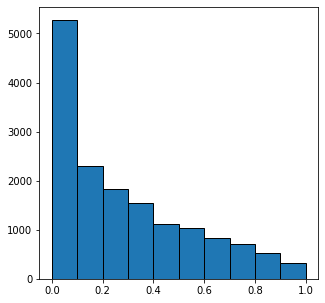

In [27]:
plt.figure(figsize=(5,5))
ax = plt.gca()
#ax.scatter(af1, af, alpha=0.05)
ax.hist(df["af"], ec="k")
plt.show()